In [1]:
# import
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import importlib

In [2]:
from utils import get_stock_data
import trade_decision as td
importlib.reload(td)

<module 'trade_decision' from '/Users/zhijiezh/Files/Projects/stock_notifier/trade_decision.py'>

[*********************100%***********************]  1 of 1 completed

Analyzing TSLA...
short_window:  5
long_window:  60
rsi_buy_signal:  45
rsi_sell_signal:  70
rsi_window:  60
Buy signals for TSLA:
 Price            Close        High         Low        Open     Volume  \
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA   
Date                                                                    
2025-03-04  272.040009  284.350006  261.839996  270.929993  126706600   
2025-03-10  222.149994  253.369995  220.000000  252.539993  189076900   
2025-03-11  230.580002  237.059998  217.020004  225.309998  174896400   
2025-03-12  248.089996  251.839996  241.100006  247.220001  142215700   
2025-03-19  235.860001  241.410004  229.199997  231.610001  111993800   
2025-03-21  248.710007  249.520004  234.550003  234.990005  132728700   
2025-03-24  278.390015  278.640015  256.329987  258.079987  169079900   
2025-03-25  288.140015  288.200012  271.279999  283.600006  150361500   
2025-03-26  272.059998  284.899994  266.510010  282.660004  15362

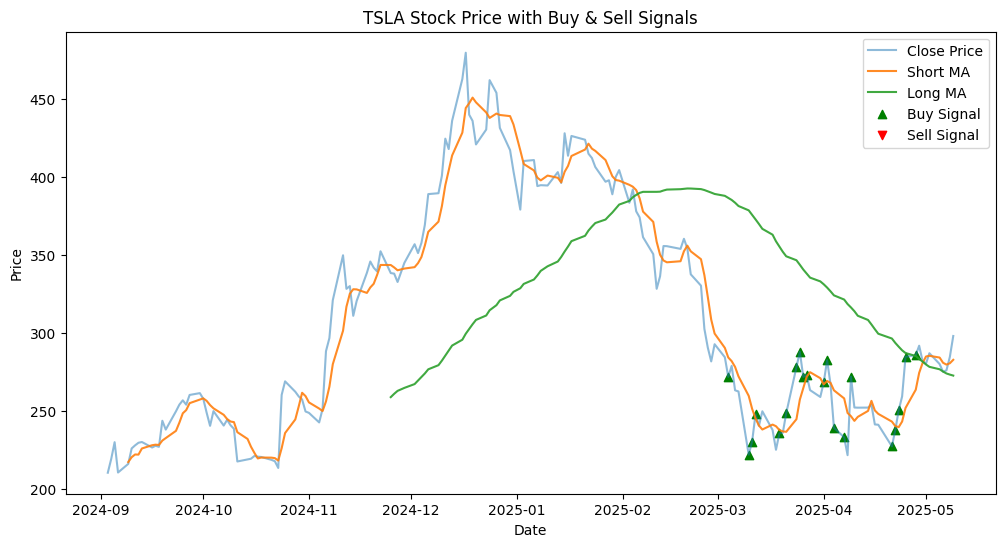

[*********************100%***********************]  1 of 1 completed

Analyzing QQQ...
short_window:  5
long_window:  60
rsi_buy_signal:  45
rsi_sell_signal:  70
rsi_window:  60
Buy signals for QQQ:
 Price            Close        High         Low        Open     Volume  \
Ticker             QQQ         QQQ         QQQ         QQQ        QQQ   
Date                                                                    
2025-03-06  487.473053  497.837571  485.476031  492.954868   57574300   
2025-03-07  491.057709  492.545480  479.814466  486.434598   54714700   
2025-03-10  472.026093  483.249346  467.962146  482.730131   76668000   
2025-03-11  470.897766  478.097021  466.314605  471.646649   68760800   
2025-03-21  480.123993  480.892835  472.205809  473.374049   42234900   
2025-03-28  468.940002  480.519989  468.049988  479.809998   46363800   
2025-03-31  468.920013  469.859985  457.329987  461.920013   53000300   
2025-04-02  476.149994  479.559998  465.859985  466.119995   49894500   
2025-04-03  450.660004  460.070007  450.140015  456.440002   704563

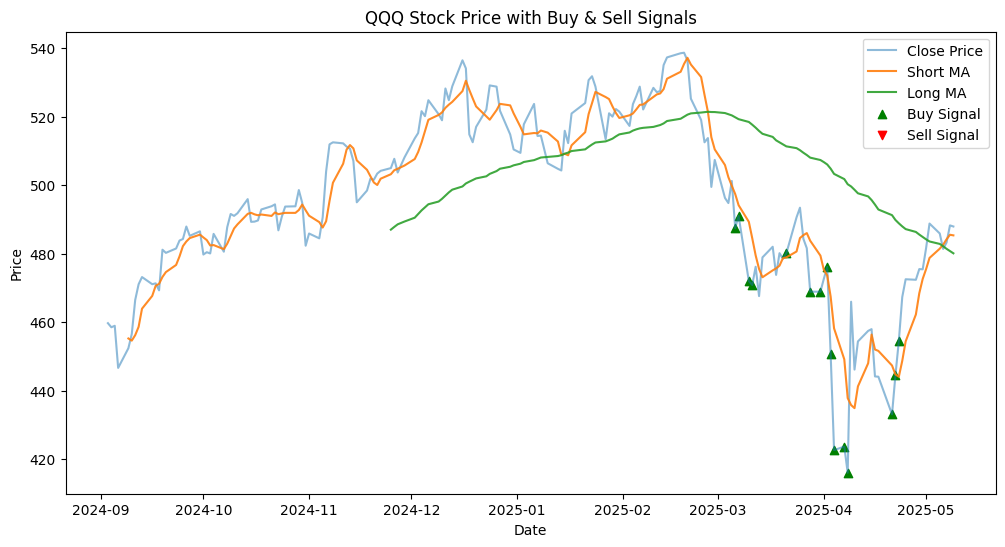

In [10]:

# # Define a list of stock tickers
tickers = ['TSLA','QQQ']
# tickers = ['BABA','PDD','ARM','BTC-USD', 'ETH-USD','NVDA','SMCI','AMC','META','SAVE','LLY', 'BAC','SHOP']
# tickers = ['DJT', 'GOOG', 'AAPL', 'NVDA', 'BTC-USD','PDD','AMC']
start_date = '2024-09-01'
end_date = '2025-05-10'

# Monitor each stock
# Monitor each stock
for ticker in tickers:
    print(f"Analyzing {ticker}...")
    stock = get_stock_data(ticker, start_date, end_date)
    buy, sell = td.decide_trade(stock, short_window=td.SHORT_WINDOW, long_window=td.LONG_WINDOW, rsi_buy_signal=td.RSI_BUY_SIGNAL, rsi_sell_signal=td.RSI_SELL_SIGNAL, rsi_window=td.RSI_WINDOW )
    print(f"Buy signals for {ticker}:\n", stock[buy])
    print(f"Sell signals for {ticker}:\n", stock[sell])

    # Optional: Plotting
    plt.figure(figsize=(12,6))
    plt.plot(stock['Close'], label='Close Price', alpha=0.5)
    plt.plot(stock['Short_MA'], label='Short MA', alpha=0.9)
    plt.plot(stock['Long_MA'], label='Long MA', alpha=0.9)
    plt.scatter(stock.index[buy], stock['Close'][buy], marker='^', color='g', label='Buy Signal', alpha=1)
    plt.scatter(stock.index[sell], stock['Close'][sell], marker='v', color='r', label='Sell Signal', alpha=1)
    plt.title(f'{ticker} Stock Price with Buy & Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.show()


In [4]:
import trade_decision_david as tdd


=== DJT ===


[*********************100%***********************]  1 of 1 completed

Buy signals: 1
Sell signals: 1
Robust buy signals: 0
Robust sell signals: 1


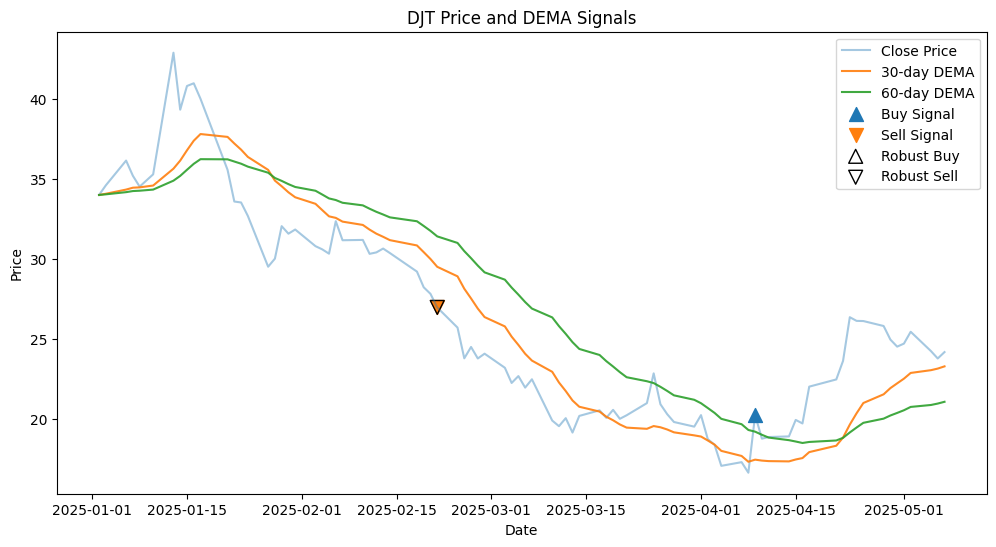


=== META ===


[*********************100%***********************]  1 of 1 completed

Buy signals: 1
Sell signals: 3
Robust buy signals: 0
Robust sell signals: 3


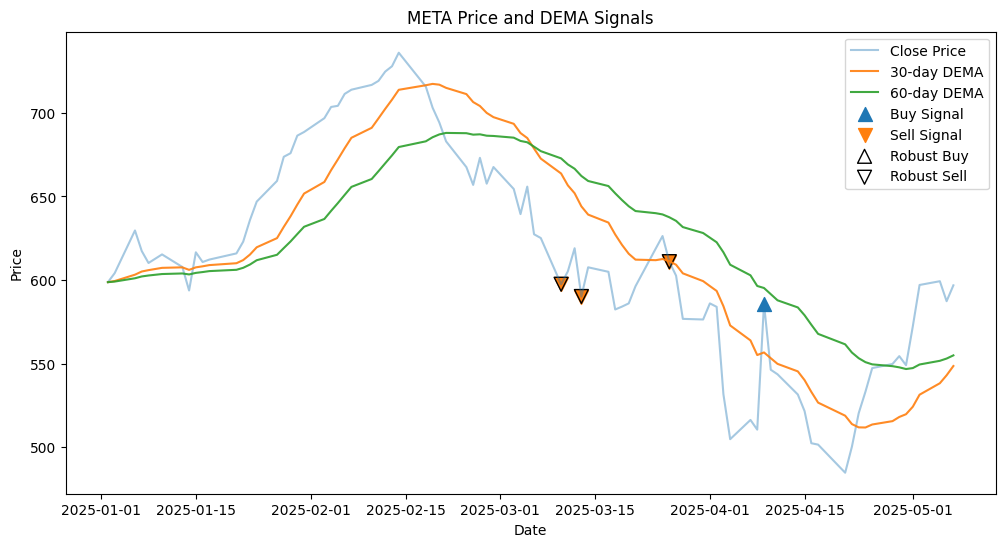


=== PLTR ===


[*********************100%***********************]  1 of 1 completed

Buy signals: 0
Sell signals: 0
Robust buy signals: 0
Robust sell signals: 0


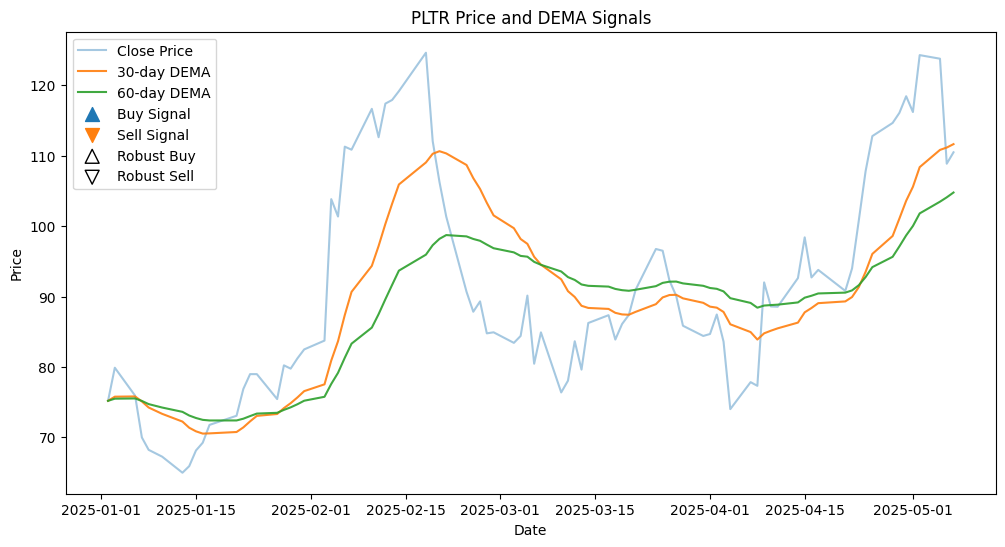

In [5]:
# 4. Backtest Function
def backtest_David(tickers: list, start_date: str, end_date: str):
    for ticker in tickers:
        print(f"\n=== {ticker} ===")
        stock = get_stock_data(ticker, start_date, end_date)  # Assuming this function is available
        buy, sell, rbuy, rsell, df = tdd.decide_trade_David(
            stock, tdd.SHORT_WINDOW, tdd.LONG_WINDOW,
            tdd.RSI_BUY_SIGNAL, tdd.RSI_SELL_SIGNAL, tdd.RSI_WINDOW
        )
        
        # Summary
        print("Buy signals:", buy.sum())
        print("Sell signals:", sell.sum())
        print("Robust buy signals:", rbuy.sum())
        print("Robust sell signals:", rsell.sum())

        # Plotting
        plt.figure(figsize=(12, 6))
        plt.plot(df['Close'], label='Close Price', alpha=0.4)
        plt.plot(df['DEMA_Short'], label=f'{tdd.SHORT_WINDOW}-day DEMA', alpha=0.9)
        plt.plot(df['DEMA_Long'],  label=f'{tdd.LONG_WINDOW}-day DEMA', alpha=0.9)
        
        # Plot signals
        plt.scatter(df.index[buy], df['Close'][buy], marker='^', s=100, label='Buy Signal')
        plt.scatter(df.index[sell], df['Close'][sell], marker='v', s=100, label='Sell Signal')
        plt.scatter(df.index[rbuy], df['Close'][rbuy], marker='^', s=100, edgecolors='k', facecolors='none', label='Robust Buy')
        plt.scatter(df.index[rsell], df['Close'][rsell], marker='v', s=100, edgecolors='k', facecolors='none', label='Robust Sell')
        
        plt.title(f'{ticker} Price and DEMA Signals')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend(loc='best')
        plt.show()


# Example usage:
tickers = ['DJT','META','PLTR']
backtest_David(tickers, '2025-01-01', '2025-05-08')